Columns in the dataset: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

--- Linear Regression ---
   Actual  Predicted
0       0   0.188667
1       0   0.287575
2       0   0.259316
3       0   0.252251
4       0   0.457131

Coefficient: [0.00706484]
Intercept: -0.5036869976672966
Mean Squared Error: 0.18312716150725122
R2 Score: 0.1910721469214871
Linear Regression Accuracy: 72.73%

--- Logistic Regression ---

Confusion Matrix:
 [[120  31]
 [ 30  50]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

Logistic Regression Accuracy: 73.59%


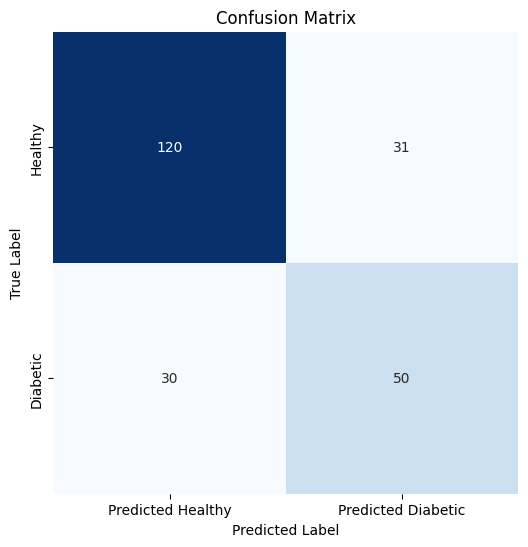

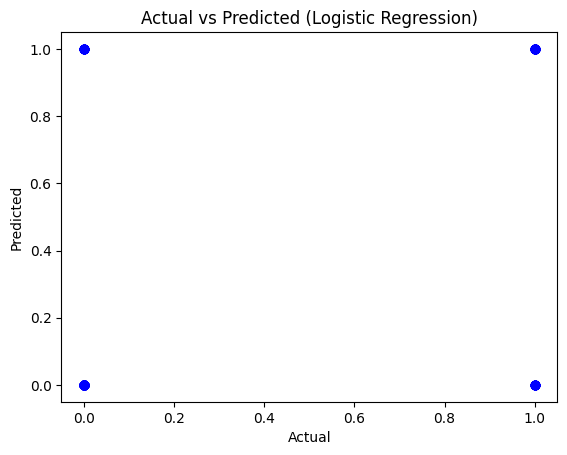

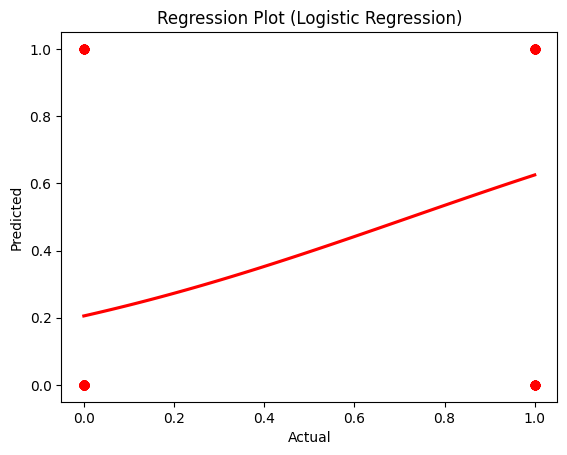

In [3]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# Load Dataset
df = pd.read_csv('diabetes.csv')
print("Columns in the dataset:", df.columns)

# Linear Regression Modeling
print("\n--- Linear Regression ---")
# Selecting features (Glucose) and target (Outcome)
X = df[['Glucose']].values  # Independent variable
y = df['Outcome'].values    # Dependent variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict using the Linear Regression Model
y_pred = linear_model.predict(X_test)

# Display Results
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(result.head())

# Model Evaluation
print("\nCoefficient:", linear_model.coef_)
print("Intercept:", linear_model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# Convert predictions to binary for accuracy calculation
y_pred_binary = np.round(y_pred).astype(int)
linear_accuracy = accuracy_score(y_test, y_pred_binary)
print('Linear Regression Accuracy: {:.2f}%'.format(linear_accuracy * 100))

# Logistic Regression Modeling
print("\n--- Logistic Regression ---")
# Selecting all features and target
X = df.iloc[:, :-1].values  # Independent variables (all except Outcome)
y = df.iloc[:, -1].values   # Target variable (Outcome)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create Logistic Regression Model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Predict using the Logistic Regression Model
y_pred_logistic = logistic_model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_logistic)
print("\nConfusion Matrix:\n", conf_matrix)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_logistic))

# Accuracy
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
print('Logistic Regression Accuracy: {:.2f}%'.format(logistic_accuracy * 100))

# Visualizations
# Heatmap of Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Predicted Healthy', 'Predicted Diabetic'],
            yticklabels=['Healthy', 'Diabetic'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Scatter Plot of Actual vs Predicted
plt.scatter(y_test, y_pred_logistic, color='blue', alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Logistic Regression)')
plt.show()

# Regression Plot
sns.regplot(x=y_test, y=y_pred_logistic, logistic=True, ci=None, color='red')
plt.title('Regression Plot (Logistic Regression)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
